In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data = pd.read_csv('../input/titanicdataset-traincsv/train.csv')

In [ ]:
#we will make the changes to this DataFrame
df = data.copy()

### DATA DESCRIPTION

In [ ]:
data.sample(10)

In [ ]:
data.shape

#### Variable Description
* Survived: Survived (1) or died (0); this is the target variable
* Pclass: Passenger's class (1st, 2nd or 3rd class)
* Name: Passenger's name
* Sex: Passenger's sex
* Age: Passenger's age
* SibSp: Number of siblings/spouses aboard
* Parch: Number of parents/children aboard
* Ticket: Ticket number
* Fare: Fare
* Cabin: Cabin
* Embarked: Port of embarkation

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
#We have null values in Age, Cabin and Embarked column
data.isnull().sum()

In [ ]:
# dropping PassengerId, Name,Fare and Ticket columns as we do not require it either for visualization or modelling.
df.drop(['PassengerId', 'Name','Ticket','Fare'],axis = 1, inplace = True)

### EXPLORATORY DATA ANALYSIS

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Survived column 

In [ ]:
sns.countplot(x = 'Survived', data = data)

In [ ]:
survived_percent = round(len(data[data['Survived'] == 1])/len(data) * 100,2)
print("Percentage of people survived = ", survived_percent,"%")

Pclass column

In [ ]:
#most passengers belonged to third class
sns.countplot(x = 'Pclass', data = data)

In [ ]:
#first class passengers were more likely to survive than other passenger classes
sns.countplot(x = 'Pclass', hue = 'Survived', data = data)

Sex column

In [ ]:
#As obvious male passengers were more than female passengers
sns.countplot(x = 'Sex', data = data)

In [ ]:
#More female passengers survuved than male passengers
sns.countplot(x = 'Sex',hue = 'Survived', data = data)

Age column

In [ ]:
sns.displot(x = 'Age',kde = True, data = data)

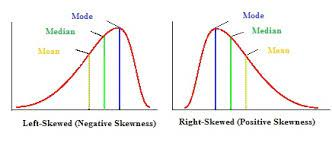

Age is right-skewed (i.e. most of the data falls onto the right side of the curve)
Using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values.

In [ ]:
print('Age mean = ', data['Age'].mean())

In [ ]:
print('Age median = ', data['Age'].median())

In [ ]:
df['Age'].fillna(df['Age'].median(skipna = True),inplace = True)

In [ ]:
#we can see more children survived than older people
plt.figure(figsize = (10,10))
sns.displot(x = 'Age',hue = 'Survived', kde = True, data = data, multiple = 'stack')

SibSp column

In [ ]:
data['SibSp'].unique()

In [ ]:
sns.countplot(x = 'SibSp',data = data)

In [ ]:
sns.countplot(x = 'SibSp',hue = 'Survived', data = data)

Parch column

In [ ]:
sns.countplot(x = 'Parch', data = data)

In [ ]:
sns.countplot(x = 'Parch', hue = 'Survived', data = data)

Cabin column

In [ ]:
data['Cabin'].unique()

In [ ]:
data['Cabin'].value_counts(dropna = False)

Most of the values of Cabin column are missing so we will drop it.

In [ ]:
df.drop(['Cabin'], axis = 1, inplace = True)

Embarked column

In [ ]:
data['Embarked'].unique()

In [ ]:
data['Embarked'].value_counts(dropna = False)

So only 2 values of the Embarked column are null so so we can just impute with the port where most people boarded.

In [ ]:
df["Embarked"].fillna(df['Embarked'].value_counts().idxmax(), inplace=True)

In [ ]:
sns.countplot(x = 'Embarked',data = data)

In [ ]:
sns.countplot(x = 'Embarked',hue = 'Survived',data = data)

Both SibSp and Parch relate to traveling with family. For simplicity's sake (and to account for possible multicollinearity), I'll combine the effect of these variables into one categorical predictor: whether or not that individual was traveling alone.

In [ ]:
#np.where(condition,x,y) if condition is true yield x, otherwise yield y.
#np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1) 0 - False 1 - True
df['TravelAlone'] = np.where((data["SibSp"]+data["Parch"])>0, 0, 1)

In [ ]:
df.drop(['SibSp','Parch'],axis = 1,inplace = True)

In [ ]:
df.head()

In [ ]:
sns.countplot(x = 'TravelAlone', data = df)

In [ ]:
sns.countplot(x = 'TravelAlone',hue = 'Survived' ,data = df)

In [ ]:
#As we saw Embarked column is also not effecting the survival of passenger , we will drop it too
df.drop(['Embarked'],axis = 1, inplace = True)

In [ ]:
x = df.drop(['Survived'],axis = 1)
y = df['Survived']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
x["Sex_n"]=le.fit_transform(x["Sex"])

In [ ]:
x

In [ ]:
x.drop(['Sex'],axis = 1, inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x ,y, test_size = 0.2, random_state = 42)

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(x_train, y_train) 

In [ ]:
model.score(x_test,y_test)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))